In [1]:
#Importing Libraries
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
# Display.max_colwidth option  set to None to show all text content without truncation
pd.set_option('display.max_colwidth', None)

#load the data
df=pd.read_csv("train.csv")

#get the shape of the dataframe
df.shape

(15819, 3)

In [26]:
# Display the dimensions of the DataFrame
display("Dimensions:", df.shape)

# Display the column names
display("Columns:", df.columns)

# Display the first few rows
display(df.head())

'Dimensions:'

(15819, 4)

'Columns:'

Index(['sentiment', 'message', 'tweetid', 'processed_text'], dtype='object')

,sentiment,message,tweetid,processed_text
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor epa chief doesnt think carbon dioxid main caus global warm wait via mashabl
1,1,It's not like we lack evidence of anthropogenic global warming,126103,like lack evid anthropogen global warm
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,rt rawstori research say three year act climat chang late
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,todayinmak wire 2016 pivot year war climat chang
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,rt soynoviodetoda 2016 racist sexist climat chang deni bigot lead poll electionnight


In [4]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

sentiment    0
message      0
tweetid      0
dtype: int64


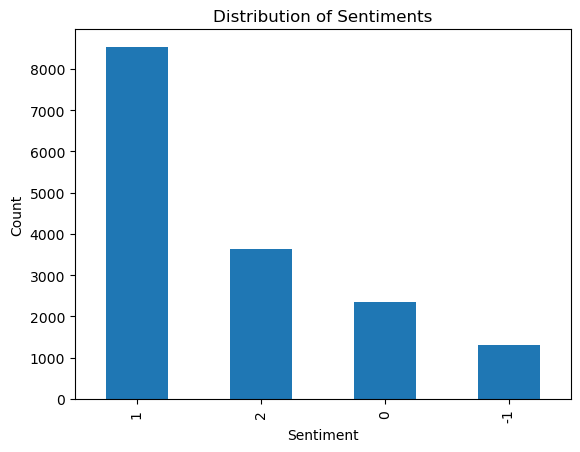

In [5]:
# Count the number of tweets per sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Plot the distribution of sentiments
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

In [6]:
#Importing Libraries
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


# Remove stopwords and perform stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = nltk.word_tokenize(text.lower())  # Tokenization
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]  # Stemming
    return ' '.join(tokens)

# Apply text preprocessing to the tweet text column
df['processed_text'] = df['message'].apply(preprocess_text)

In [7]:
# Word frequencies
word_frequencies = df['processed_text'].str.split(expand=True).stack().value_counts()

# Top hashtags
hashtags = df['message'].apply(lambda x: re.findall(r'\#\w+', x)).explode().value_counts()

# Top mentions
mentions = df['message'].apply(lambda x: re.findall(r'\@\w+', x)).explode().value_counts()


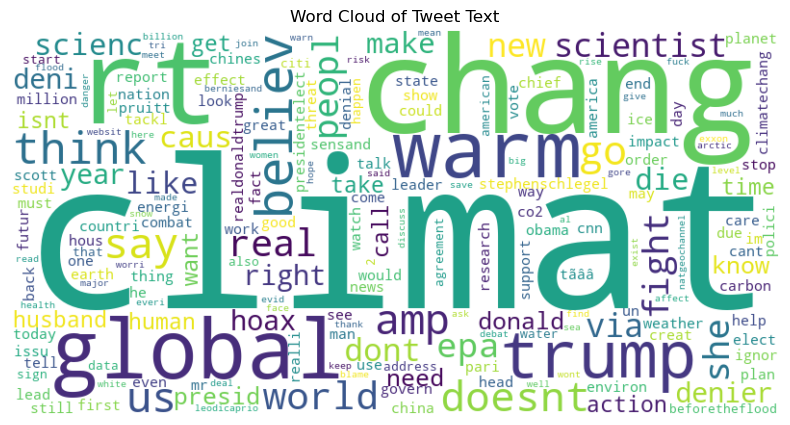

In [15]:
#Importing Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Text')
plt.show()

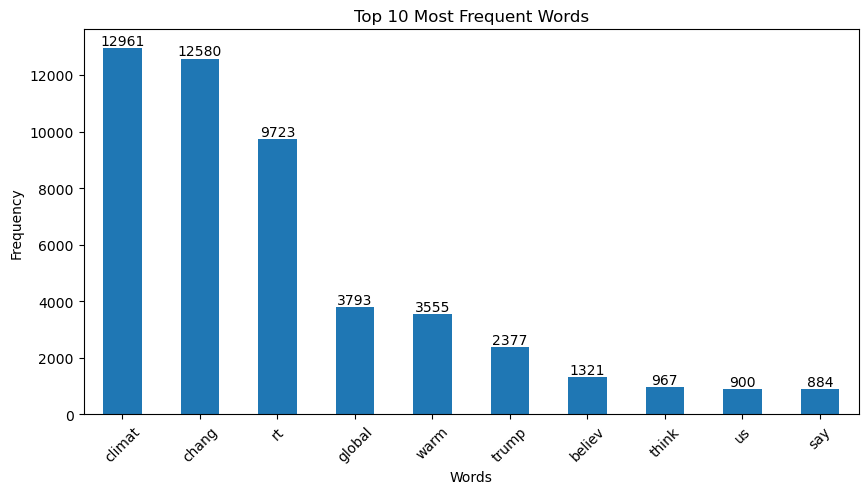

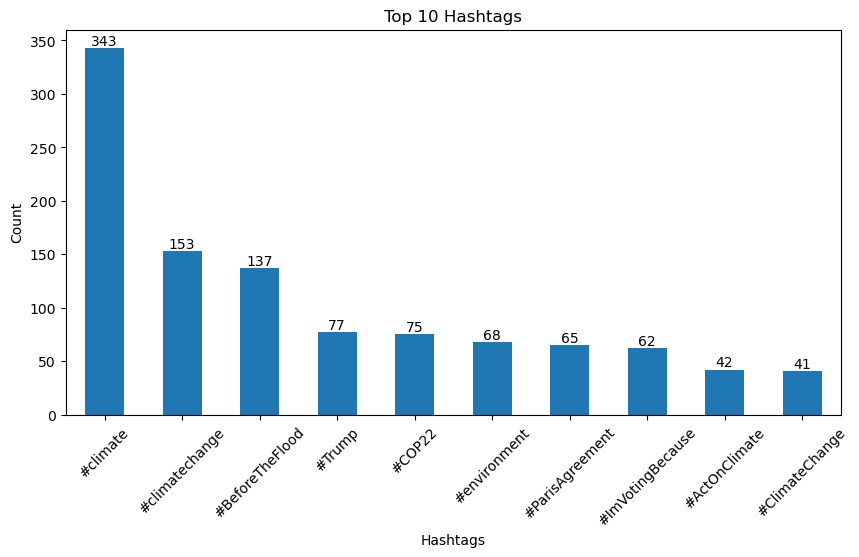

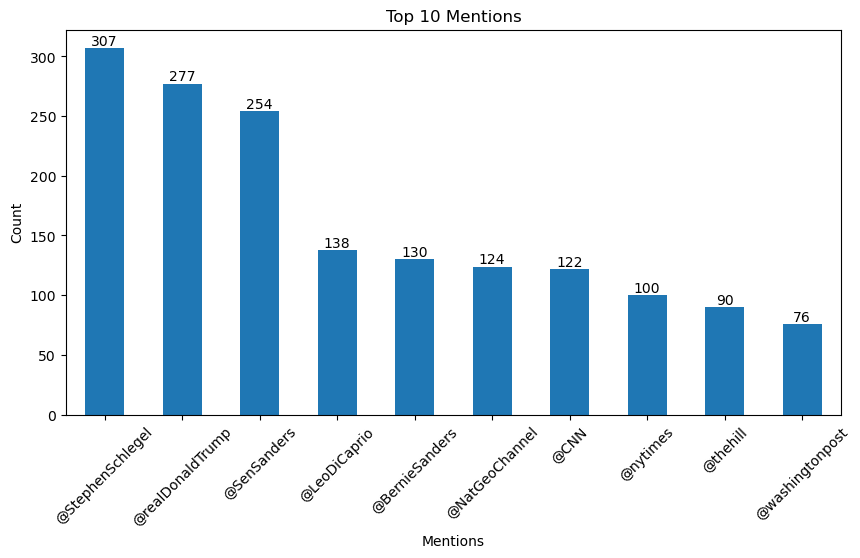

In [29]:
# Plot top frequent words
plt.figure(figsize=(10, 5))
top_n = 10  # Specify the number of top words to display
word_frequencies_top_n = word_frequencies.head(top_n)
word_frequencies_top_n.plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Words')
plt.xticks(rotation=45)
for i, v in enumerate(word_frequencies_top_n):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

# Plot top hashtags
plt.figure(figsize=(10, 5))
hashtags[:10].plot(kind='bar')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 10 Hashtags')
plt.xticks(rotation=45)
for i, v in enumerate(hashtags[:10]):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

# Plot top mentions
plt.figure(figsize=(10, 5))
mentions[:10].plot(kind='bar')
plt.xlabel('Mentions')
plt.ylabel('Count')
plt.title('Top 10 Mentions')
plt.xticks(rotation=45)
for i, v in enumerate(mentions[:10]):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [17]:
# Create separate DataFrames for each sentiment value
sentiment_minus1 = df[df['sentiment'] == -1].copy()
sentiment_zero = df[df['sentiment'] == 0].copy()
sentiment_one = df[df['sentiment'] == 1].copy()
sentiment_two = df[df['sentiment'] == 2].copy()

print("Sentiment -1 DataFrame:")
display(sentiment_minus1.head())

print("Sentiment 0 DataFrame:")
display(sentiment_zero.head())

print("Sentiment 1 DataFrame:")
display(sentiment_one.head())

print("Sentiment 2 DataFrame:")
display(sentiment_two.head())



# Word frequencies
word_frequencies_m1 = sentiment_minus1['processed_text'].str.split(expand=True).stack().value_counts()
word_frequencies0 = sentiment_zero['processed_text'].str.split(expand=True).stack().value_counts()
word_frequencies1 = sentiment_one['processed_text'].str.split(expand=True).stack().value_counts()
word_frequencies2 = sentiment_two['processed_text'].str.split(expand=True).stack().value_counts()

# Top hashtags
hashtags_m1 = sentiment_minus1['message'].apply(lambda x: re.findall(r'\#\w+', x)).explode().value_counts()
hashtags0 = sentiment_zero['message'].apply(lambda x: re.findall(r'\#\w+', x)).explode().value_counts()
hashtags1 = sentiment_one['message'].apply(lambda x: re.findall(r'\#\w+', x)).explode().value_counts()
hashtags2 = sentiment_two['message'].apply(lambda x: re.findall(r'\#\w+', x)).explode().value_counts()

# Top mentions
mentions_m1 = sentiment_minus1['message'].apply(lambda x: re.findall(r'\@\w+', x)).explode().value_counts()
mentions0 = sentiment_zero['message'].apply(lambda x: re.findall(r'\@\w+', x)).explode().value_counts()
mentions1 = sentiment_one['message'].apply(lambda x: re.findall(r'\@\w+', x)).explode().value_counts()
mentions2 = sentiment_two['message'].apply(lambda x: re.findall(r'\@\w+', x)).explode().value_counts()

Sentiment -1 DataFrame:


,sentiment,message,tweetid,processed_text
28,-1,Sally Kohn’s latest evidence of climate change proves she is ‘not a smart person’ https://t.co/MhkzoGL9Vt via @twitchyteam Need we say more,355491,salli kohn latest evid climat chang prove smart person via twitchyteam need say
46,-1,@realDonaldTrump Carbon Tax is a Globalist idea to enslave the world's population. It is the whole reason for propagating global warming!,61141,realdonaldtrump carbon tax globalist idea enslav world popul whole reason propag global warm
48,-1,"RT @SteveSGoddard: We had winds close to 100 MPH in the area this afternoon. I would blame climate change, except that this happens pr…",719523,rt stevesgoddard wind close 100 mph area afternoon would blame climat chang except happen pr
56,-1,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining about snowflakes ❄️ in winter =global warming 🤦‍♂️,911385,misslizzynj lmao snowflak complain snowflak winter global warm
57,-1,RT @Dawn2334Dawn: This is ONE of Arnold Schwarzenegger's vehicles. He is now whining about climate change.\nHow's his maid...illegal or\nhttp…,768263,rt dawn2334dawn one arnold schwarzenegg vehicl whine climat chang how maidilleg


Sentiment 0 DataFrame:


,sentiment,message,tweetid,processed_text
19,0,Calum: *tweets abt reunitingish w the cast*\n-sees replies begging him to come to their countries-\nCalum: *goes back to rting climate change*,547924,calum tweet abt reunitingish w cast see repli beg come countri calum goe back rting climat chang
22,0,"we also met this guy, he let us in on some truth about climate change and gay people not existing https://t.co/Q7yOMcMZaj",67545,also met guy let us truth climat chang gay peopl exist
30,0,@Jnp_Ftw are these the same scientists that denounce climate change? It's not a choice,365051,jnp_ftw scientist denounc climat chang choic
39,0,We’ ve dealt with simple issues like climate change and energy policy. Now the complex issues. Mal vs Tones. #qanda,403368,dealt simpl issu like climat chang energi polici complex issu mal vs tone qanda
43,0,"RT @andrewsharp: Win probability is bullshit man. I saw the NBA Finals and that's when I knew, global warming isn't real",326916,rt andrewsharp win probabl bullshit man saw nba final that knew global warm isnt real


Sentiment 1 DataFrame:


,sentiment,message,tweetid,processed_text
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor epa chief doesnt think carbon dioxid main caus global warm wait via mashabl
1,1,It's not like we lack evidence of anthropogenic global warming,126103,like lack evid anthropogen global warm
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,todayinmak wire 2016 pivot year war climat chang
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,rt soynoviodetoda 2016 racist sexist climat chang deni bigot lead poll electionnight
5,1,Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,425577,worth read whether dont believ climat chang


Sentiment 2 DataFrame:


,sentiment,message,tweetid,processed_text
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,rt rawstori research say three year act climat chang late
12,2,"RT @tveitdal: We only have a 5 percent chance of avoiding ‘dangerous’ global warming, a study finds https://t.co/xUBTqNxhkK https://t.co/of…",454673,rt tveitdal 5 percent chanc avoid danger global warm studi find
14,2,"Fossil fuel giant ExxonMobil ‘misled’ the public about climate change, Harvard academics conclude https://t.co/ofc2WSu4EX",658092,fossil fuel giant exxonmobil misl public climat chang harvard academ conclud
26,2,Bangladesh confronting climate change head on https://t.co/MTqeNBQDUt https://t.co/itgkUxgEfg,365291,bangladesh confront climat chang head
32,2,RT @latimes: Atmospheric rivers fueled by climate change could decimate wild oysters in San Francisco Bay https://t.co/p0LZBhlU5K https://t…,143471,rt latim atmospher river fuel climat chang could decim wild oyster san francisco bay


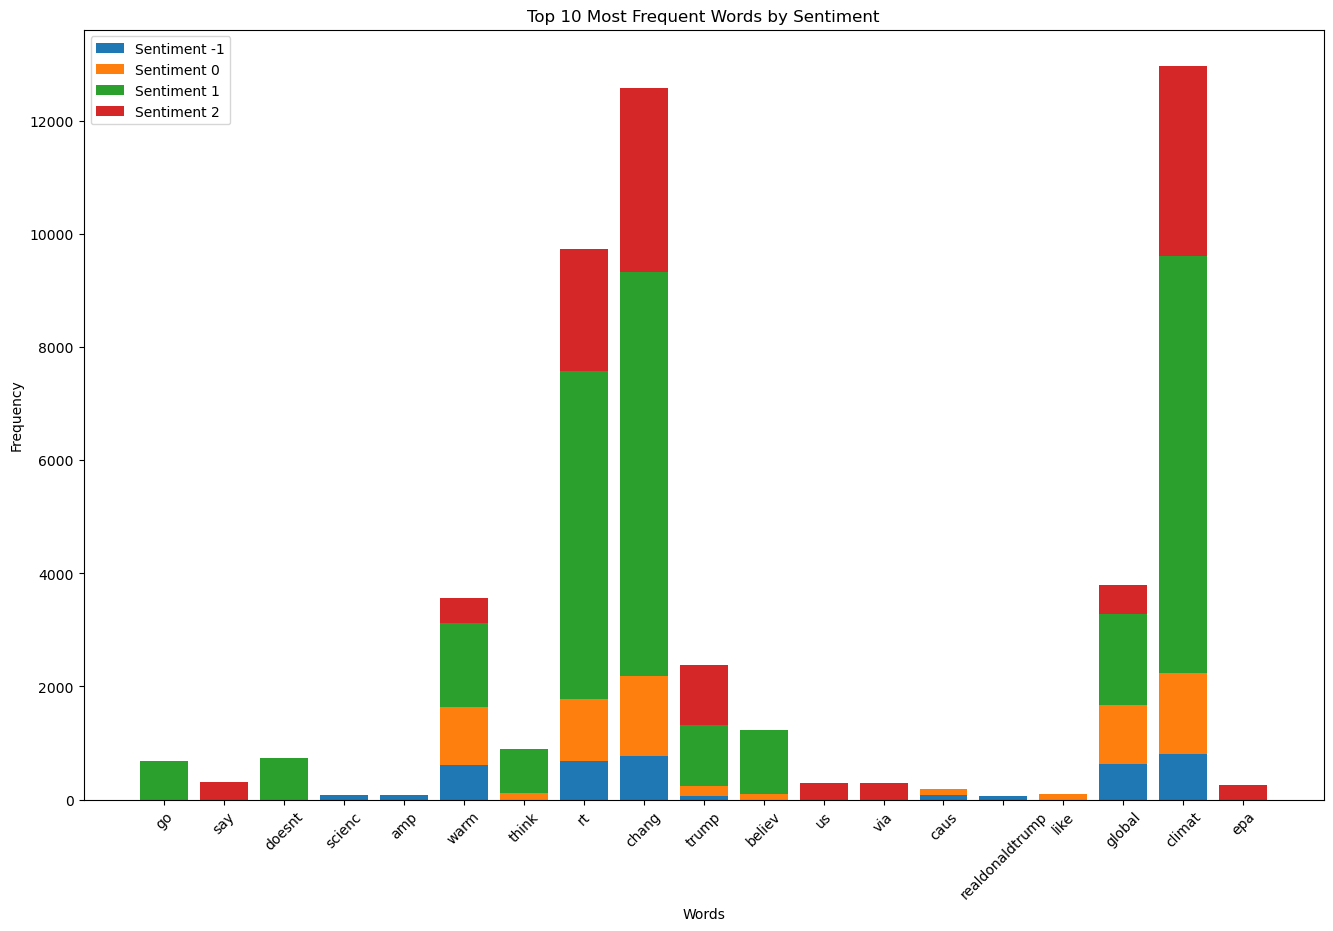

In [35]:
# Define the number of top words to display
top_n = 10

# Get the top words and their frequencies for each sentiment category
top_words_m1 = word_frequencies_m1.index[:top_n]
top_words0 = word_frequencies0.index[:top_n]
top_words1 = word_frequencies1.index[:top_n]
top_words2 = word_frequencies2.index[:top_n]

top_word_freq_m1 = word_frequencies_m1.values[:top_n]
top_word_freq0 = word_frequencies0.values[:top_n]
top_word_freq1 = word_frequencies1.values[:top_n]
top_word_freq2 = word_frequencies2.values[:top_n]

# Create a list of all top words
all_top_words = list(set(top_words_m1) | set(top_words0) | set(top_words1) | set(top_words2))

# Initialize the arrays to store the word frequencies for each sentiment category
stacked_word_freq_m1 = np.zeros(len(all_top_words))
stacked_word_freq0 = np.zeros(len(all_top_words))
stacked_word_freq1 = np.zeros(len(all_top_words))
stacked_word_freq2 = np.zeros(len(all_top_words))

# Populate the stacked word frequencies arrays
for i, word in enumerate(all_top_words):
    if word in top_words_m1:
        stacked_word_freq_m1[i] = top_word_freq_m1[np.where(top_words_m1 == word)][0]
    if word in top_words0:
        stacked_word_freq0[i] = top_word_freq0[np.where(top_words0 == word)][0]
    if word in top_words1:
        stacked_word_freq1[i] = top_word_freq1[np.where(top_words1 == word)][0]
    if word in top_words2:
        stacked_word_freq2[i] = top_word_freq2[np.where(top_words2 == word)][0]

# Plot the stacked bar plot
plt.figure(figsize=(16, 10))
plt.bar(all_top_words, stacked_word_freq_m1, label='Sentiment -1')
plt.bar(all_top_words, stacked_word_freq0, bottom=stacked_word_freq_m1, label='Sentiment 0')
plt.bar(all_top_words, stacked_word_freq1, bottom=stacked_word_freq_m1 + stacked_word_freq0, label='Sentiment 1')
plt.bar(all_top_words, stacked_word_freq2, bottom=stacked_word_freq_m1 + stacked_word_freq0 + stacked_word_freq1, label='Sentiment 2')
plt.title('Top 10 Most Frequent Words by Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()





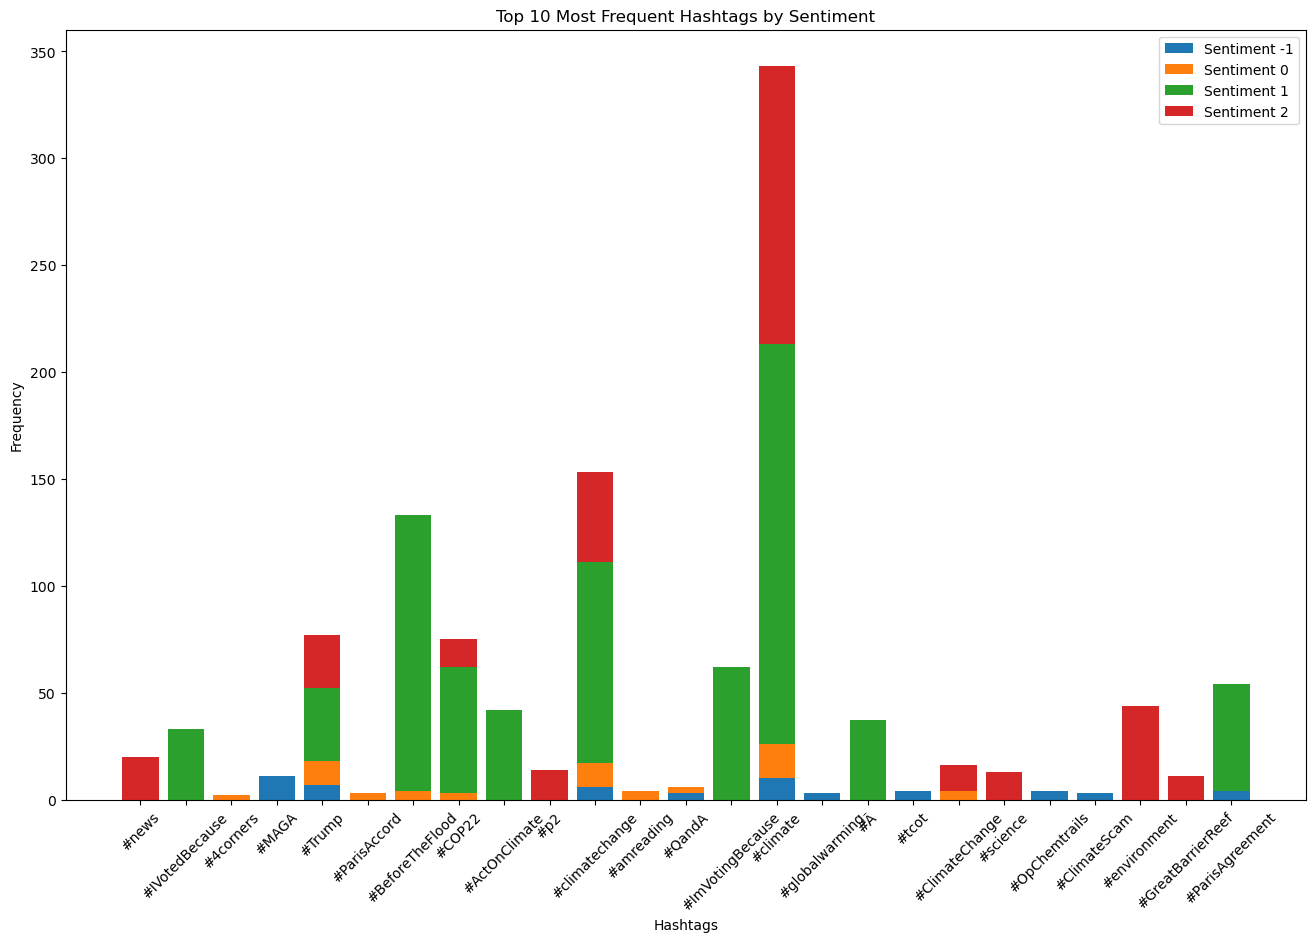

In [40]:
# Define the number of top hashtags to display
top_n = 10

# Get the top hashtags and their frequencies for each sentiment category
top_hashtags_m1 = hashtags_m1.index[:top_n]
top_hashtags0 = hashtags0.index[:top_n]
top_hashtags1 = hashtags1.index[:top_n]
top_hashtags2 = hashtags2.index[:top_n]

top_hashtag_freq_m1 = hashtags_m1.values[:top_n]
top_hashtag_freq0 = hashtags0.values[:top_n]
top_hashtag_freq1 = hashtags1.values[:top_n]
top_hashtag_freq2 = hashtags2.values[:top_n]

# Create a list of all top hashtags
all_top_hashtags = list(set(top_hashtags_m1) | set(top_hashtags0) | set(top_hashtags1) | set(top_hashtags2))

# Initialize the arrays to store the hashtag frequencies for each sentiment category
stacked_hashtag_freq_m1 = np.zeros(len(all_top_hashtags))
stacked_hashtag_freq0 = np.zeros(len(all_top_hashtags))
stacked_hashtag_freq1 = np.zeros(len(all_top_hashtags))
stacked_hashtag_freq2 = np.zeros(len(all_top_hashtags))

# Populate the stacked hashtag frequencies arrays
for i, hashtag in enumerate(all_top_hashtags):
    if hashtag in top_hashtags_m1:
        stacked_hashtag_freq_m1[i] = top_hashtag_freq_m1[np.where(top_hashtags_m1 == hashtag)][0]
    if hashtag in top_hashtags0:
        stacked_hashtag_freq0[i] = top_hashtag_freq0[np.where(top_hashtags0 == hashtag)][0]
    if hashtag in top_hashtags1:
        stacked_hashtag_freq1[i] = top_hashtag_freq1[np.where(top_hashtags1 == hashtag)][0]
    if hashtag in top_hashtags2:
        stacked_hashtag_freq2[i] = top_hashtag_freq2[np.where(top_hashtags2 == hashtag)][0]

# Plot the stacked bar plot for hashtags
plt.figure(figsize=(16, 10))
plt.bar(all_top_hashtags, stacked_hashtag_freq_m1, label='Sentiment -1')
plt.bar(all_top_hashtags, stacked_hashtag_freq0, bottom=stacked_hashtag_freq_m1, label='Sentiment 0')
plt.bar(all_top_hashtags, stacked_hashtag_freq1, bottom=stacked_hashtag_freq_m1 + stacked_hashtag_freq0, label='Sentiment 1')
plt.bar(all_top_hashtags, stacked_hashtag_freq2, bottom=stacked_hashtag_freq_m1 + stacked_hashtag_freq0 + stacked_hashtag_freq1, label='Sentiment 2')
plt.title('Top 10 Most Frequent Hashtags by Sentiment')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
#for i, v in enumerate(stacked_hashtag_freq_m1):
    #plt.text(i, v, str(int(v)), ha='center', va='bottom')
    

plt.show()


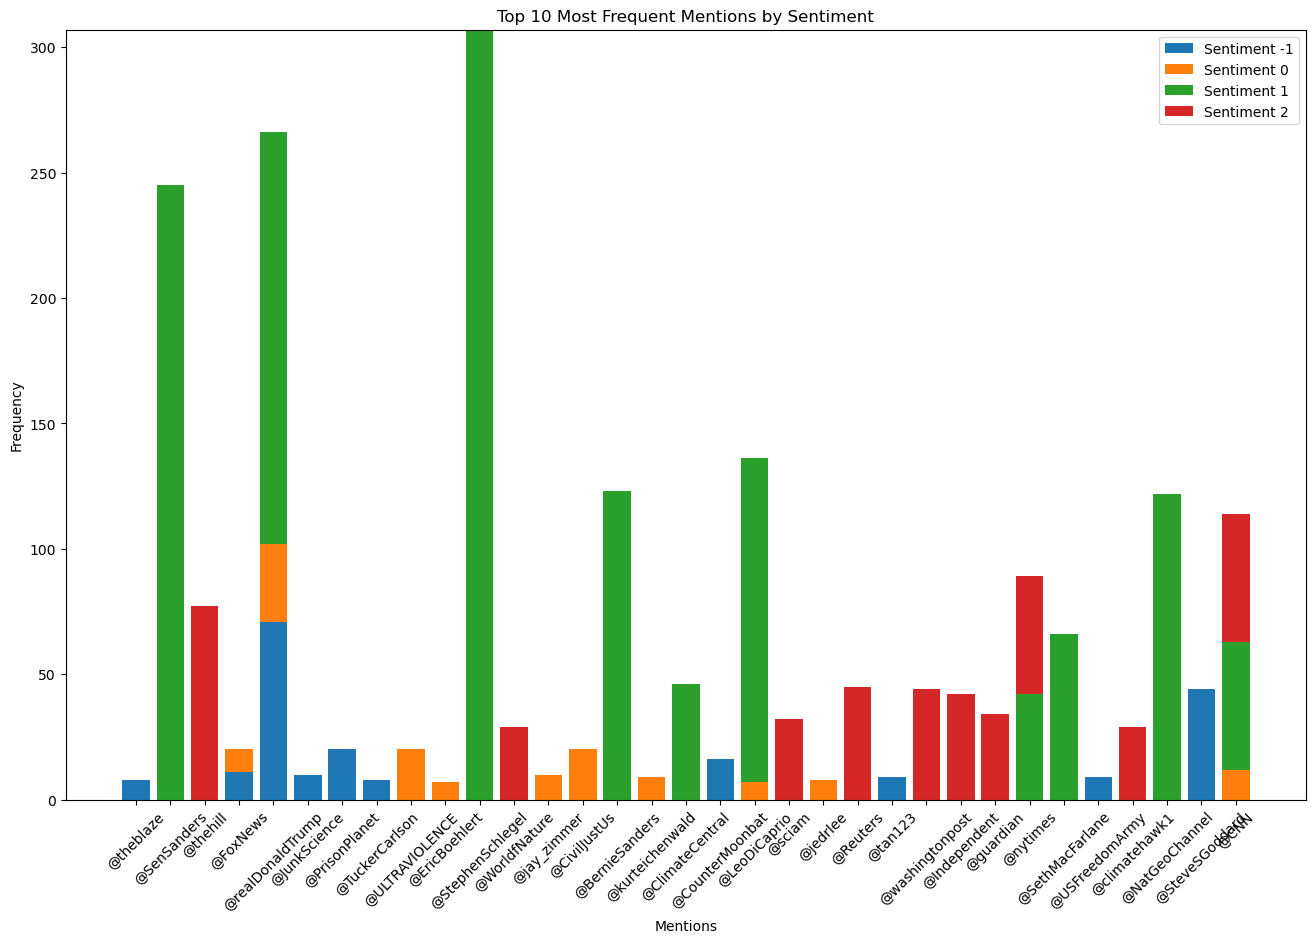

In [37]:
# Define the number of top mentions to display
top_n = 10

# Get the top mentions and their frequencies for each sentiment category
top_mentions_m1 = mentions_m1.index[:top_n]
top_mentions0 = mentions0.index[:top_n]
top_mentions1 = mentions1.index[:top_n]
top_mentions2 = mentions2.index[:top_n]

top_mention_freq_m1 = mentions_m1.values[:top_n]
top_mention_freq0 = mentions0.values[:top_n]
top_mention_freq1 = mentions1.values[:top_n]
top_mention_freq2 = mentions2.values[:top_n]

# Create a list of all top mentions
all_top_mentions = list(set(top_mentions_m1) | set(top_mentions0) | set(top_mentions1) | set(top_mentions2))

# Initialize the arrays to store the mention frequencies for each sentiment category
stacked_mention_freq_m1 = np.zeros(len(all_top_mentions))
stacked_mention_freq0 = np.zeros(len(all_top_mentions))
stacked_mention_freq1 = np.zeros(len(all_top_mentions))
stacked_mention_freq2 = np.zeros(len(all_top_mentions))

# Populate the stacked mention frequencies arrays
for i, mention in enumerate(all_top_mentions):
    if mention in top_mentions_m1:
        stacked_mention_freq_m1[i] = top_mention_freq_m1[np.where(top_mentions_m1 == mention)][0]
    if mention in top_mentions0:
        stacked_mention_freq0[i] = top_mention_freq0[np.where(top_mentions0 == mention)][0]
    if mention in top_mentions1:
        stacked_mention_freq1[i] = top_mention_freq1[np.where(top_mentions1 == mention)][0]
    if mention in top_mentions2:
        stacked_mention_freq2[i] = top_mention_freq2[np.where(top_mentions2 == mention)][0]

# Plot the stacked bar plot for mentions
plt.figure(figsize=(16, 10))
plt.bar(all_top_mentions, stacked_mention_freq_m1, label='Sentiment -1')
plt.bar(all_top_mentions, stacked_mention_freq0, bottom=stacked_mention_freq_m1, label='Sentiment 0')
plt.bar(all_top_mentions, stacked_mention_freq1, bottom=stacked_mention_freq_m1 + stacked_mention_freq0, label='Sentiment 1')
plt.bar(all_top_mentions, stacked_mention_freq2, bottom=stacked_mention_freq_m1 + stacked_mention_freq0 + stacked_mention_freq1, label='Sentiment 2')
plt.title('Top 10 Most Frequent Mentions by Sentiment')
plt.xlabel('Mentions')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()


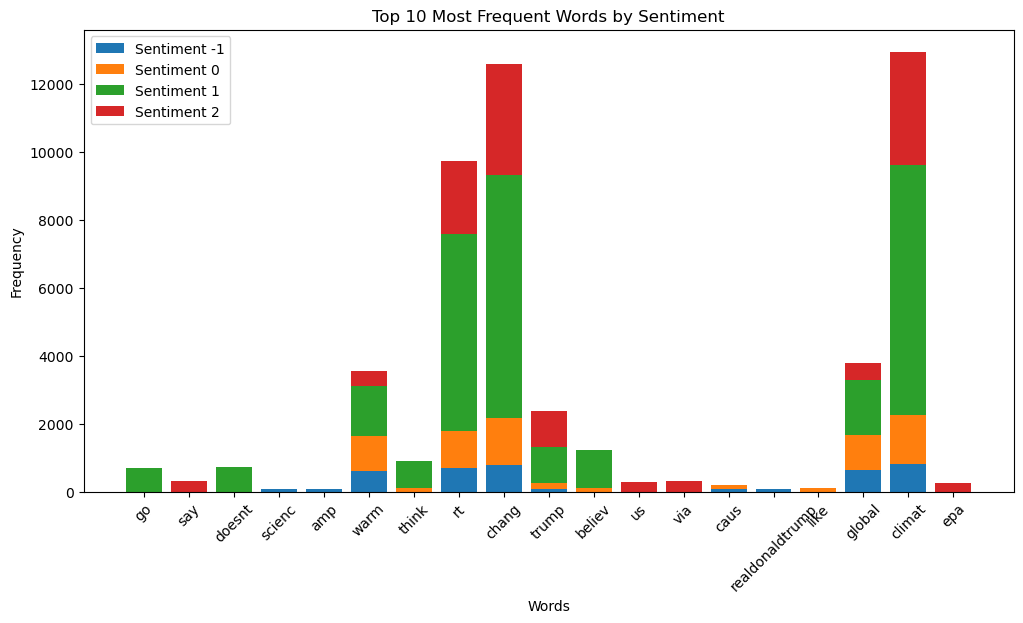

In [30]:
# Define the number of top words to display
top_n = 10

# Get the top words and their frequencies for each sentiment category
top_words_m1 = word_frequencies_m1.index[:top_n]
top_words0 = word_frequencies0.index[:top_n]
top_words1 = word_frequencies1.index[:top_n]
top_words2 = word_frequencies2.index[:top_n]

top_word_freq_m1 = word_frequencies_m1.values[:top_n]
top_word_freq0 = word_frequencies0.values[:top_n]
top_word_freq1 = word_frequencies1.values[:top_n]
top_word_freq2 = word_frequencies2.values[:top_n]

# Create a list of all top words
all_top_words = list(set(top_words_m1) | set(top_words0) | set(top_words1) | set(top_words2))

# Initialize the arrays to store the word frequencies for each sentiment category
stacked_word_freq_m1 = np.zeros(len(all_top_words))
stacked_word_freq0 = np.zeros(len(all_top_words))
stacked_word_freq1 = np.zeros(len(all_top_words))
stacked_word_freq2 = np.zeros(len(all_top_words))

# Populate the stacked word frequencies arrays
for i, word in enumerate(all_top_words):
    if word in top_words_m1:
        stacked_word_freq_m1[i] = top_word_freq_m1[np.where(top_words_m1 == word)][0]
    if word in top_words0:
        stacked_word_freq0[i] = top_word_freq0[np.where(top_words0 == word)][0]
    if word in top_words1:
        stacked_word_freq1[i] = top_word_freq1[np.where(top_words1 == word)][0]
    if word in top_words2:
        stacked_word_freq2[i] = top_word_freq2[np.where(top_words2 == word)][0]

# Plot the stacked bar plot
plt.figure(figsize=(12, 6))
plt.bar(all_top_words, stacked_word_freq_m1, label='Sentiment -1')
plt.bar(all_top_words, stacked_word_freq0, bottom=stacked_word_freq_m1, label='Sentiment 0')
plt.bar(all_top_words, stacked_word_freq1, bottom=stacked_word_freq_m1 + stacked_word_freq0, label='Sentiment 1')
plt.bar(all_top_words, stacked_word_freq2, bottom=stacked_word_freq_m1 + stacked_word_freq0 + stacked_word_freq1, label='Sentiment 2')
plt.title('Top 10 Most Frequent Words by Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()
